Below is a comprehensive solution that addresses both the conceptual questions and the programming tasks from the assignment. The answer is split into two main parts: first, we explain the core ideas behind boosting techniques and then we provide sample Python code for each practical/theoretical task.

---

## 1. Boosting Techniques – Conceptual Questions

### 1.1. What is Boosting in Machine Learning
Boosting is an ensemble method that builds a strong classifier by sequentially combining many weak learners (often decision trees). Each new model is trained to correct the errors made by the previous models. In doing so, boosting reduces both bias and variance and often achieves higher predictive performance than any individual weak learner.

### 1.2. How does Boosting differ from Bagging
- **Boosting:**  
  - Learners are built sequentially.
  - Each new learner focuses on the mistakes of its predecessors.
  - The predictions are combined using weighted voting or averaging.
  
- **Bagging (Bootstrap Aggregating):**  
  - Learners are trained in parallel on different bootstrap samples.
  - The final prediction is obtained by averaging (for regression) or majority voting (for classification).
  - It primarily helps in reducing variance.

### 1.3. What is the key idea behind AdaBoost
AdaBoost (Adaptive Boosting) works by assigning equal weights to all training samples initially and then adjusting those weights based on the classification errors. Misclassified samples receive higher weights so that subsequent models focus more on the difficult cases. Each weak learner’s contribution is weighted by its accuracy, and the final prediction is a weighted sum (or vote) of these learners.

### 1.4. Explain the working of AdaBoost with an example
1. **Initialization:** All samples start with equal weights.
2. **Iteration 1:**  
   - Train a weak classifier (e.g., a decision stump).
   - Calculate the weighted error rate.
   - Increase the weight of misclassified examples.
3. **Iteration 2:**  
   - Train a new weak classifier on the reweighted data.
   - Again, compute its error and adjust the sample weights.
4. **Final Model:**  
   - Combine all the weak classifiers with weights proportional to their accuracy.
   - The final prediction is a weighted vote of all classifiers.

*Example:* Imagine classifying emails as spam or not. Initially, all emails have equal weight. After the first classifier, the emails misclassified (say, actual spam that were labeled as non-spam) are given higher weights. The next classifier focuses on these tricky emails, and the process repeats. The final decision is based on the weighted majority vote from all classifiers.

### 1.5. What is Gradient Boosting, and how is it different from AdaBoost
Gradient Boosting builds models in a sequential manner like AdaBoost, but instead of reweighting data points, it fits each new model to the residual errors (the difference between the observed and predicted values) of the previous model. By using gradient descent, it minimizes a chosen loss function directly. This makes Gradient Boosting more flexible since it can optimize arbitrary differentiable loss functions.

### 1.6. What is the loss function in Gradient Boosting
The loss function in Gradient Boosting is problem-dependent. For example:
- **Regression:** Mean Squared Error (MSE) is commonly used.
- **Classification:** Exponential loss (similar to AdaBoost) or logistic loss.
The key idea is that at each iteration, the new model is trained to predict the negative gradient (residual) of the loss function with respect to the current model’s predictions.

### 1.7. How does XGBoost improve over traditional Gradient Boosting
XGBoost (Extreme Gradient Boosting) offers several enhancements:
- **Regularization:** Introduces L1 and L2 penalties to control overfitting.
- **Parallelization:** Uses parallel processing to speed up training.
- **Handling Missing Data:** Efficiently deals with missing values.
- **Tree Pruning:** Uses a more sophisticated algorithm for pruning trees.
- **Sparsity Awareness:** Optimized for sparse data.
These features make XGBoost both faster and often more accurate than standard gradient boosting implementations.

### 1.8. What is the difference between XGBoost and CatBoost
- **XGBoost:**  
  - Generally designed for numerical data.
  - Requires manual encoding (e.g., one-hot) for categorical features.
  
- **CatBoost:**  
  - Specifically optimized for categorical features.
  - Uses techniques like ordered boosting and target encoding to handle categorical data natively, reducing preprocessing and often providing better results on such datasets.

### 1.9. What are some real-world applications of Boosting techniques
Boosting techniques are used in various applications such as:
- Fraud detection
- Credit scoring and risk assessment
- Customer churn prediction
- Medical diagnosis and disease prediction
- Recommendation systems
- Search ranking algorithms

### 1.10. How does regularization help in XGBoost
Regularization in XGBoost (via L1 and L2 penalties) controls the complexity of the model by penalizing large weights. This helps prevent overfitting, thereby enhancing the model’s generalization ability on unseen data.

### 1.11. What are some hyperparameters to tune in Gradient Boosting models
Important hyperparameters include:
- **Learning Rate:** Controls the contribution of each weak learner.
- **Number of Estimators:** Total number of boosting rounds.
- **Max Depth:** Maximum depth of each tree.
- **Subsample:** Fraction of samples to use for fitting each tree.
- **Min Samples Split/Leaf:** Minimum number of samples required to split an internal node or be at a leaf node.
- Additional parameters (especially in XGBoost): `colsample_bytree`, `gamma`, etc.

### 1.12. What is the concept of Feature Importance in Boosting
Feature importance measures the contribution of each feature to the predictive performance of the model. In tree-based boosting methods, it is often calculated based on:
- **Frequency:** How often a feature is used to split the data.
- **Gain:** The improvement in the loss function when a feature is used.
- **Cover:** The number of samples affected by the splits on that feature.
This helps in interpreting the model and selecting important features.

### 1.13. Why is CatBoost efficient for categorical data?
CatBoost is efficient for categorical data because it:
- Automatically converts categorical variables into numerical representations using techniques such as target-based statistics.
- Uses ordered boosting to avoid target leakage and reduce overfitting.
- Requires minimal preprocessing, making it more straightforward and often more effective on datasets with many categorical features.

---

## 2. Theoretical Programming Tasks

Below are sample Python code snippets addressing the practical assignments. (Before running, ensure that the necessary libraries such as scikit-learn, xgboost, catboost, matplotlib, and seaborn are installed.)

### 2.1. Train an AdaBoost Classifier on a Sample Dataset and Print Model Accuracy

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_clf.fit(X_train, y_train)

# Predict and print accuracy
y_pred = ada_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", accuracy)

AdaBoost Classifier Accuracy: 0.8466666666666667



```

### 2.2. Train an AdaBoost Regressor and Evaluate Performance Using Mean Absolute Error (MAE)


In [2]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Generate a regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost Regressor
ada_reg = AdaBoostRegressor(n_estimators=50, random_state=42)
ada_reg.fit(X_train, y_train)

# Predict and evaluate using MAE
y_pred = ada_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("AdaBoost Regressor MAE:", mae)

AdaBoost Regressor MAE: 76.37968386777507


### 2.3. Train a Gradient Boosting Classifier on the Breast Cancer Dataset and Print Feature Importance

Feature Importances:
worst radius: 0.4432
worst perimeter: 0.1505
mean concave points: 0.1318
worst concave points: 0.1269
worst texture: 0.0350
worst area: 0.0294
mean texture: 0.0279
worst concavity: 0.0139
area error: 0.0083
worst smoothness: 0.0073
concave points error: 0.0044
texture error: 0.0041
radius error: 0.0031
concavity error: 0.0021
symmetry error: 0.0018
perimeter error: 0.0017
mean compactness: 0.0014
fractal dimension error: 0.0013
mean symmetry: 0.0009
worst compactness: 0.0008
compactness error: 0.0007
mean area: 0.0006
mean concavity: 0.0006
smoothness error: 0.0005
worst fractal dimension: 0.0005
mean perimeter: 0.0003
mean fractal dimension: 0.0003
mean radius: 0.0003
worst symmetry: 0.0002
mean smoothness: 0.0001


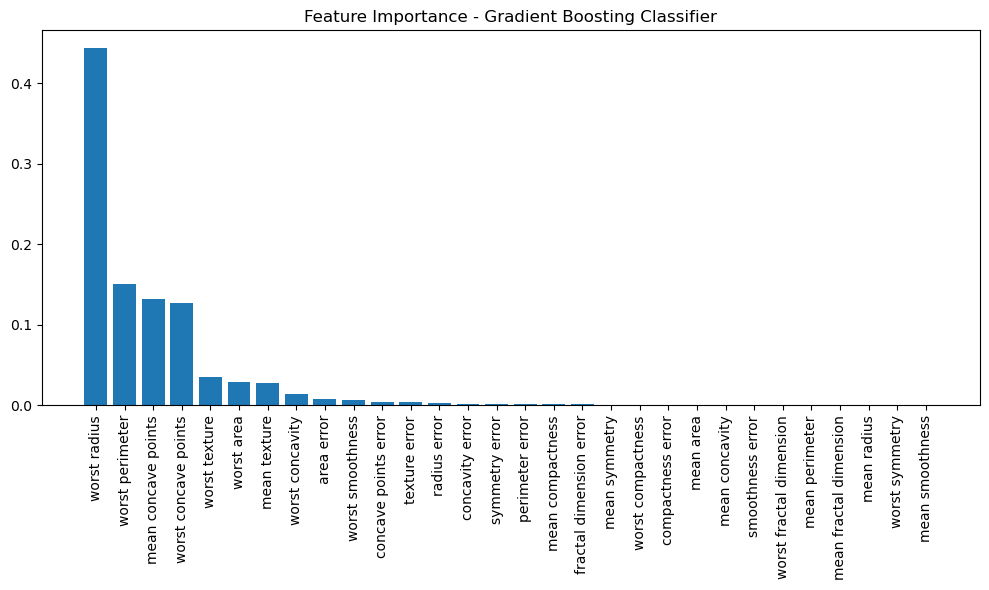

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X, y)

# Get and print feature importances
importances = gb_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = data.feature_names

print("Feature Importances:")
for idx in indices:
    print(f"{features[idx]}: {importances[idx]:.4f}")

# Plot feature importances
plt.figure(figsize=(10,6))
plt.title("Feature Importance - Gradient Boosting Classifier")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.show()

### 2.4. Train a Gradient Boosting Regressor and Evaluate Using R-Squared Score

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Generate a regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)

# Predict and evaluate using R-Squared Score
y_pred = gb_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Regressor R2 Score:", r2)

Gradient Boosting Regressor R2 Score: 0.9114229798905495


### 2.5. Train an XGBoost Classifier on a Dataset and Compare Accuracy with Gradient Boosting


In [5]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("XGBoost Classifier Accuracy:", accuracy_xgb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)

d:\Program Files\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:34:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier Accuracy: 0.8966666666666666
Gradient Boosting Classifier Accuracy: 0.87


### 2.6. Train a CatBoost Classifier and Evaluate Using F1-Score

In [6]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Generate a classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train CatBoost Classifier (suppressing output)
cat_clf = CatBoostClassifier(iterations=100, verbose=0, random_state=42)
cat_clf.fit(X_train, y_train)

# Predict and evaluate using F1-Score
y_pred = cat_clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("CatBoost Classifier F1-Score:", f1)

CatBoost Classifier F1-Score: 0.8637873754152824


### 2.7. Train an XGBoost Regressor and Evaluate Using Mean Squared Error (MSE)

In [7]:
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate a regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)

# Predict and evaluate using MSE
y_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("XGBoost Regressor MSE:", mse)

XGBoost Regressor MSE: 5683.435638220713


### 2.8. Train an AdaBoost Classifier and Visualize Feature Importance

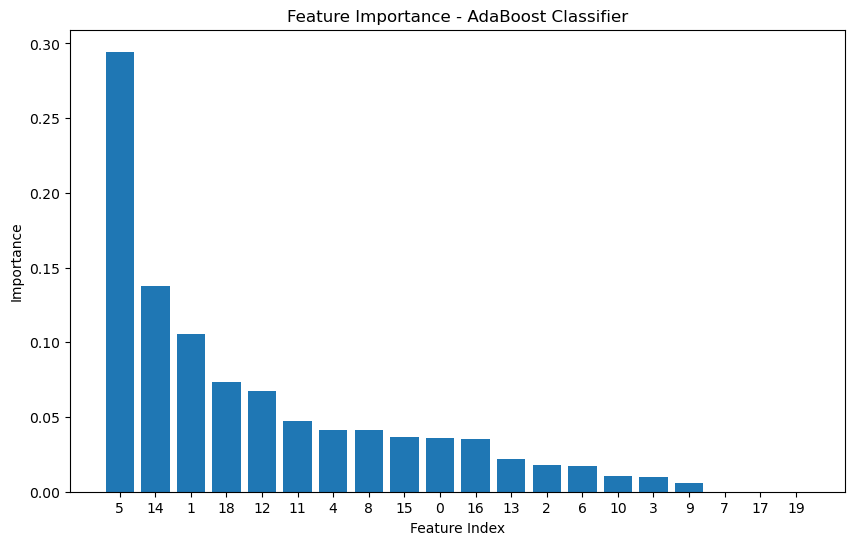

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_clf.fit(X_train, y_train)

# Feature importance (for weak learners that provide it, e.g., decision stumps)
importances = ada_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance - AdaBoost Classifier")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

### 2.9. Train a Gradient Boosting Regressor and Plot Learning Curves

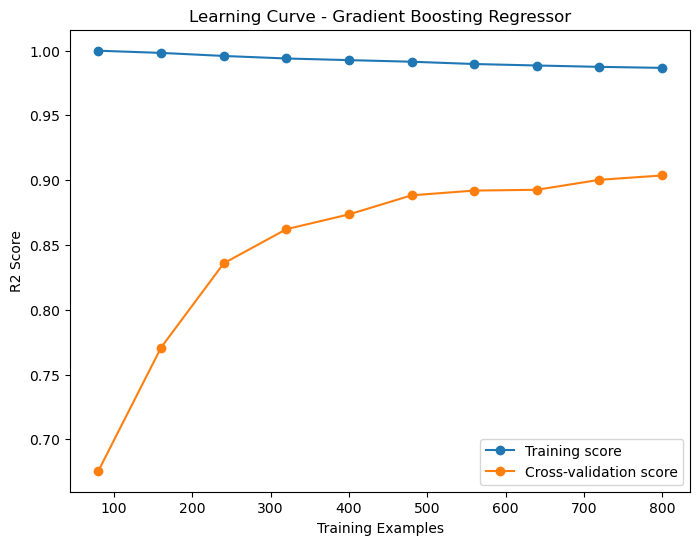

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import learning_curve

# Generate dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Initialize model
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(
    gb_reg, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
plt.title("Learning Curve - Gradient Boosting Regressor")
plt.xlabel("Training Examples")
plt.ylabel("R2 Score")
plt.legend(loc="best")
plt.show()

### 2.10. Train an XGBoost Classifier and Visualize Feature Importance

d:\Program Files\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:34:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


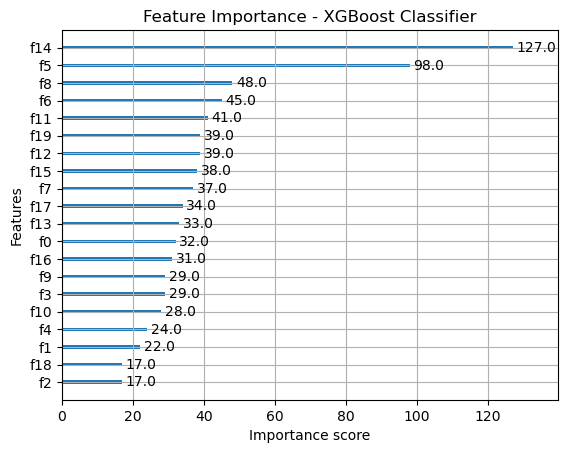

In [10]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train XGBoost Classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Plot feature importance using XGBoost's built-in plot function
xgb.plot_importance(xgb_clf)
plt.title("Feature Importance - XGBoost Classifier")
plt.show()

### 2.11. Train a CatBoost Classifier and Plot the Confusion Matrix

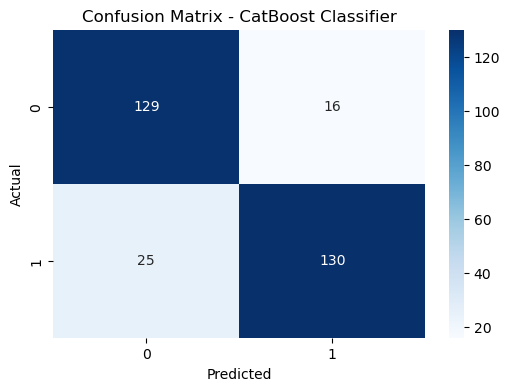

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train CatBoost Classifier
cat_clf = CatBoostClassifier(iterations=100, verbose=0, random_state=42)
cat_clf.fit(X_train, y_train)

# Predict and compute confusion matrix
y_pred = cat_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 2.12. Train an AdaBoost Classifier with Different Numbers of Estimators and Compare Accuracy

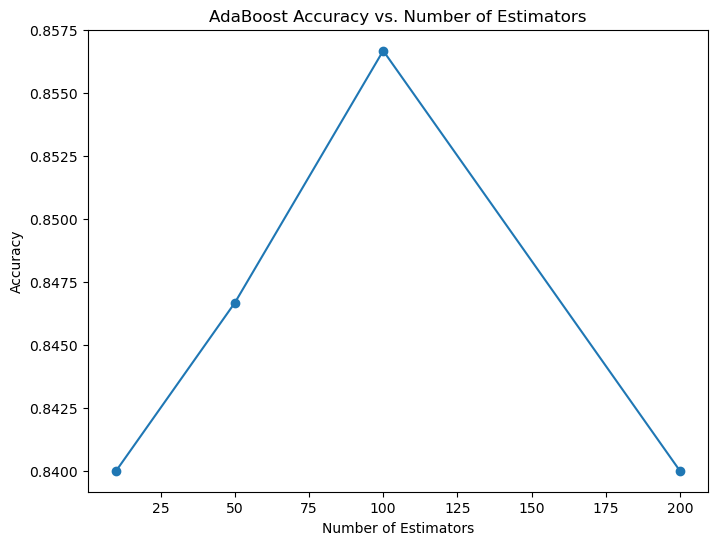

In [12]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

estimators = [10, 50, 100, 200]
accuracies = []

for n in estimators:
    clf = AdaBoostClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,6))
plt.plot(estimators, accuracies, marker='o')
plt.title("AdaBoost Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.show()

### 2.13. Train a Gradient Boosting Classifier and Visualize the ROC Curve

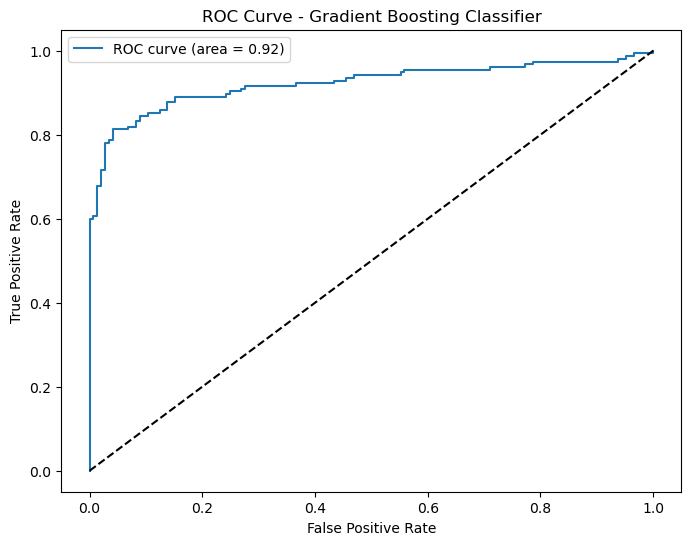

In [13]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Generate dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_proba = gb_clf.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.legend(loc="best")
plt.show()

### 2.14. Train an XGBoost Regressor and Tune the Learning Rate Using GridSearchCV

In [14]:
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Generate dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Learning Rate:", grid_search.best_params_['learning_rate'])

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("XGBoost Regressor MSE with tuned learning rate:", mse)

Best Learning Rate: 0.1
XGBoost Regressor MSE with tuned learning rate: 4828.385631753702


### 2.15. Train a CatBoost Classifier on an Imbalanced Dataset and Compare Performance with Class Weighting

In [15]:
import numpy as np
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

# Generate an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class weights
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))

# Train CatBoost Classifier with class weights
cat_clf = CatBoostClassifier(iterations=100, random_state=42, verbose=0, class_weights=class_weights_dict)
cat_clf.fit(X_train, y_train)

# Evaluate performance
y_pred = cat_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       270
           1       0.66      0.70      0.68        30

    accuracy                           0.93       300
   macro avg       0.81      0.83      0.82       300
weighted avg       0.94      0.93      0.93       300



### 2.16. Train an AdaBoost Classifier and Analyze the Effect of Different Learning Rates

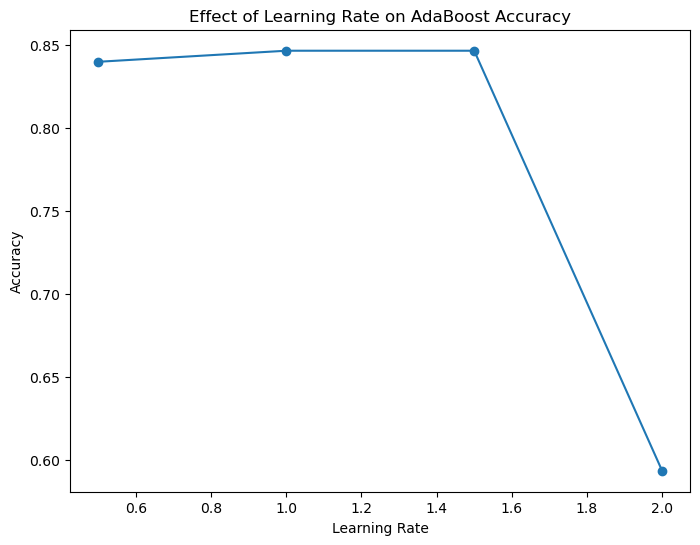

In [16]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

learning_rates = [0.5, 1.0, 1.5, 2.0]
accuracies = []

for lr in learning_rates:
    clf = AdaBoostClassifier(n_estimators=50, learning_rate=lr, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,6))
plt.plot(learning_rates, accuracies, marker='o')
plt.title("Effect of Learning Rate on AdaBoost Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.show()

### 2.17. Train an XGBoost Classifier for Multi-Class Classification and Evaluate Using Log-Loss

In [17]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Generate a multi-class dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train multi-class XGBoost Classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, objective='multi:softprob', num_class=3, 
                            use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predict probabilities and evaluate log-loss
y_proba = xgb_clf.predict_proba(X_test)
loss = log_loss(y_test, y_proba)
print("XGBoost Classifier Log-Loss:", loss)

XGBoost Classifier Log-Loss: 0.4702044378190372


d:\Program Files\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:34:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
